#Ejercicio 3

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def newton_method_sympy(F_func, J_func, x0, tol=1e-7, max_iter=100):
    """
    Método de Newton-Raphson para sistemas no lineales usando sympy.
    """
    x = np.array(x0, dtype=float)
    approximations = [x.copy()]
    eigenvalue = 0

    for i in range(max_iter):
        J = np.array(J_func(*x), dtype=float)
        F_x = np.array(F_func(*x), dtype=float).flatten()
        try:
            delta_x = np.linalg.solve(J, -F_x)
        except np.linalg.LinAlgError:
            raise ValueError("Matriz Jacobiana singular. No se puede invertir.")

        x = x + delta_x
        approximations.append(x.copy())

        # Mostrar la iteración
        print(f"Iteración {i + 1}: x = {x}")

        if np.linalg.norm(delta_x, ord=np.inf) < tol:
            eigenvalue = np.linalg.eigvals(J)
            break

    return approximations, x, eigenvalue


In [38]:
def plot_direction_field(F, xmin, xmax, ymin, ymax, xstep, ystep, unitary=False, plot_streamlines=False, streamline_start=None):
    """
    Plot the direction field and streamlines of a vector field defined by function F.

    Parameters:
    - F: Function to compute the vector field. It should return (u, v) for input coordinates (x, y).
    - xmin, xmax: Limits for the x-axis.
    - ymin, ymax: Limits for the y-axis.
    - xstep, ystep: Number of steps along the x and y axes to create the grid.
    - unitary: If True, normalize the vectors to unit length.
    - plot_streamlines: If True, plot streamlines in addition to the direction field.
    - streamline_start: List of starting points for the streamlines. Required if plot_streamlines is True.
    """
    # Create ranges and subdivisions for x and y axes
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    # Generate the grid of points to plot
    X, Y = np.meshgrid(x, y)

    # Evaluate the vector field at each point on the grid
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    # Normalize the vectors if unitary is True
    if unitary:
        magnitude = np.hypot(U, V)
        U, V = U / magnitude, V / magnitude

    # Plot the vector field using quiver
    plt.quiver(X, Y, U, V, color='purple', angles='xy')
    plt.title('Direction Field')
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the streamlines if specified
    if plot_streamlines:
        if streamline_start:
            start_points = np.array([streamline_start])
            plt.streamplot(X, Y, U, V, color='blue', start_points=start_points)
        else:
            plt.streamplot(X, Y, U, V, color='blue')

    plt.show()


In [27]:
# Puntos iniciales
initial_points = [
    np.array([0.1, 0.1]),
    np.array([-1 - 0.j, -1 - 0.j], dtype=np.complex128),
    np.array([0.1 + 0.j, 1 - 0.j], dtype=np.complex128),
    np.array([1 - 0.j, -1 + 0.j], dtype=np.complex128),
]

In [30]:
# Definir la tolerancia
tol = 1e-7

## Inciso 1

Iteración 1: x = [ 0.00449102 -0.02125749]
Iteración 2: x = [-0.00026471 -0.0001183 ]
Iteración 3: x = [ 3.66523444e-08 -2.41968506e-08]
Iteración 4: x = [-4.81261079e-16  1.42768509e-15]
Iteración 1: x = [-1.91666667 -0.125     ]
Iteración 2: x = [-2.41197037 -0.56128878]
Iteración 3: x = [-2.35370483 -0.48500535]
Iteración 4: x = [-2.35424147 -0.48342452]
Iteración 5: x = [-2.35424307 -0.48342488]
Iteración 6: x = [-2.35424307 -0.48342488]
Iteración 1: x = [0.28494687 1.05844156]
Iteración 2: x = [0.2788597  1.06461942]
Iteración 3: x = [0.27888449 1.06463911]
Iteración 4: x = [0.27888449 1.06463911]
Iteración 1: x = [ 0.92857143 -1.05357143]
Iteración 2: x = [ 0.93251653 -1.05742029]
Iteración 3: x = [ 0.93250144 -1.05740471]
Iteración 4: x = [ 0.93250143 -1.05740471]

Ceros encontrados:

Cero: [-4.81261079e-16  1.42768509e-15]
Eigenvalue: [ 5.00000019 -3.99999978]

Cero: [-2.35424307 -0.48342488]
Eigenvalue: [ -5.20548156 -19.69119221]

Cero: [0.27888449 1.06463911]
Eigenvalue: [2.

<ipython-input-29-d729ab37c10f>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x0, dtype=float)


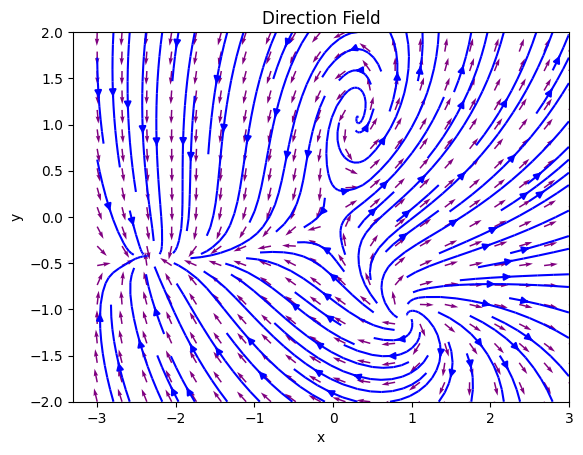

In [39]:
# Definir las variables
x, y = sp.symbols('x y')

# Definir el sistema de ecuaciones F(x, y)
F1 = 4*x + 2*y + 2*x**2 - 3*y**2
F2 = 4*x - 3*y + 7*x*y

# Crear la matriz Jacobiana
F = sp.Matrix([F1, F2])
vars = sp.Matrix([x, y])
J = F.jacobian(vars)

# Convertir a funciones numéricas
F_func = sp.lambdify((x, y), F, 'numpy')
J_func = sp.lambdify((x, y), J, 'numpy')

# Ejecutar el método de Newton para cada punto inicial
zeros = []
for x0 in initial_points:
    approximations, solution, eigenvalue = newton_method_sympy(F_func, J_func, x0, tol)
    if all(np.linalg.norm(solution - z, ord=2) >= tol for z, _ in zeros):
        zeros.append([solution, eigenvalue])

# Mostrar las soluciones encontradas y los valores propios de la Jacobiana
print("\nCeros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:", zero)
    print("Eigenvalue:", eigenvalue)

# Verificación de las soluciones
for zero, _ in zeros:
    F1_value = F1.subs({x: zero[0], y: zero[1]})
    F2_value = F2.subs({x: zero[0], y: zero[1]})

    print("\nVerificación de las soluciones:")
    print(f"F1 = {F1_value.evalf()}")
    print(f"F2 = {F2_value.evalf()}")


# Función auxiliar que define el campo vectorial para la graficación
def F(x, y):
    u = 4*x + 2*y + 2*x**2 - 3*y**2
    v = 4*x - 3*y + 7*x*y
    return u, v

# Graficar el campo de direcciones
plot_direction_field(F, xmin=-3, xmax=3, ymin=-2, ymax=2, xstep=20, ystep=20, unitary=True, plot_streamlines=True)


## Inciso 2

Iteración 1: x = [  9.46847826 -19.93369565]
Iteración 2: x = [17.82988504 34.23094227]
Iteración 3: x = [12.80752899 14.57781617]
Iteración 4: x = [9.88339865 7.76568136]
Iteración 5: x = [8.33810769 5.58501292]
Iteración 6: x = [7.72343855 5.0130998 ]
Iteración 7: x = [7.60941672 4.93201821]
Iteración 8: x = [7.60555555 4.92963494]
Iteración 9: x = [7.60555128 4.92963248]
Iteración 10: x = [7.60555128 4.92963248]
Iteración 1: x = [ 3.         -1.33333333]
Iteración 2: x = [3.46153846 3.38461538]
Iteración 3: x = [4.01600413 2.88693856]
Iteración 4: x = [4.00036914 2.99967247]
Iteración 5: x = [4.00000001 2.99999995]
Iteración 6: x = [4. 3.]
Iteración 1: x = [2.48093923 2.89226519]
Iteración 2: x = [3.86372174 2.45968026]
Iteración 3: x = [3.98280104 3.00683795]
Iteración 4: x = [3.99998204 2.99991358]
Iteración 5: x = [4. 3.]
Iteración 6: x = [4. 3.]
Iteración 1: x = [1.92307692 5.53846154]
Iteración 2: x = [ 21.72127872 -34.78921079]
Iteración 3: x = [ 11.78968258 -14.84560409]
Iter

<ipython-input-29-d729ab37c10f>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x0, dtype=float)


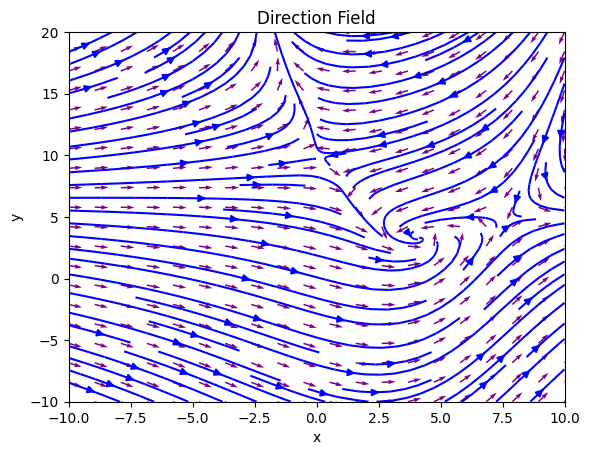

In [40]:
# Definir el sistema de ecuaciones F(x, y)

F1 = 33 - 10*x - 3*y + x**2
F2 = -18 + 6*x + 2*y -x*y

# Crear la matriz Jacobiana
F = sp.Matrix([F1, F2])
vars = sp.Matrix([x, y])
J = F.jacobian(vars)

# Convertir a funciones numéricas
F_func = sp.lambdify((x, y), F, 'numpy')
J_func = sp.lambdify((x, y), J, 'numpy')

# Ejecutar el método de Newton para cada punto inicial
zeros = []
for x0 in initial_points:
    approximations, solution, eigenvalue = newton_method_sympy(F_func, J_func, x0, tol)
    if all(np.linalg.norm(solution - z, ord=2) >= tol for z, _ in zeros):
        zeros.append([solution, eigenvalue])

# Mostrar las soluciones encontradas y los valores propios de la Jacobiana
print("\nCeros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:", zero)
    print("Eigenvalue:", eigenvalue)

# Verificación de las soluciones
for zero, _ in zeros:
    F1_value = F1.subs({x: zero[0], y: zero[1]})
    F2_value = F2.subs({x: zero[0], y: zero[1]})

    print("\nVerificación de las soluciones:")
    print(f"F1 = {F1_value.evalf()}")
    print(f"F2 = {F2_value.evalf()}")

# Función auxiliar que define el campo vectorial para la graficación
def F(x, y):
    u = 33 - 10*x - 3*y + x**2
    v = -18 + 6*x + 2*y - x*y
    return u, v

# Graficar el campo de direcciones
plot_direction_field(F, xmin=-10, xmax=10, ymin=-10, ymax=20, xstep=20, ystep=20, unitary=True, plot_streamlines=True)
